<a href="https://colab.research.google.com/github/skycstage/skycstage/blob/main/Stage_INDS589_Project_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3><div><font face="Garamond" color="#33302e">
Sky C. Stage<br>
INDS589: Artificial Intelligence<br>
Project 6


---


</font></div>
---

<h1><b><div><font face="Garamond" color="#33302e">
Problem
</font></div></b>
<h3><font face="Garamond" color="#33302e">
From a web site of sports download data about the players in a sport like baseball, basketball, volleyball, cricket, soccer, water polo, or similar. <br><Br>The data should contain the names, scores (or other performance measure), salary, and positions in the team (say, goalkeeper, defender, striker, etc.). <br><Br>
Assume that you are a manager, have a given budget, say 100 M, and have to hire players for a new team. 
You have to optimize the total score of the optimal team, while staying within budget.
Make sure that the players you hire are for the respective positions.<br><Br>
Provide nice interface and output in the form of report. Provide justification in the report. (Outcome: Excel file containing text with explanations and justification.)

<h1><b><div><font face="Garamond" color="#33302e">
Step 1: Scrape player salary data from HoopsHype
</font></div></b>
<h3><font face="Garamond" color="#33302e">
HoopsHype contains player payroll data up to the 2024/25 season (for contracts already signed). Thus, the first thing you want to do is extract the dataset into a pandas Dataframe.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

url="https://hoopshype.com/salaries/players/"

<h1><b><div><font face="Garamond" color="#33302e">
Step 2: Extract the table element from the web-page
</font></div></b>
<h3><font face="Garamond" color="#33302e">
Fetch the relevant url content with the request.get method, then save the response in the r variable and extract its text content only with the .text method.<br><Br>
Parse it into a BeautifulSoup object and locate the dataset by pointing to the html table tag via the soup.find method.

In [ ]:
r = requests.get(url,timeout=2.5)
r_html = r.text

soup = BeautifulSoup(r_html, 'html.parser')

salary_table = soup.find('table')

<h1><b><div><font face="Garamond" color="#33302e">
Step 3: Extract table rows from the table element
</font></div></b>
<h3><font face="Garamond" color="#33302e">
The html table element is composed of table data cells identified by the td html tag. Fetch the total number of data cells with the len function over the salary_table.find_all(“td”) list elements, which is a list of all data cells in the table.<br><Br>
By exploring the list of all td data cells (salary_table.find_all(“td”), we notice that the data cell starting at index 10 makes up the first data cell of the first column of the table, the one containing the player names. Then all data cells at indexes 11 through 15 contain the all data cells with salary data for 2019/20–2024/25 years. All indexes <10 contain the table headers.

In [ ]:
length=len(salary_table.find_all("td"))

player_names=[salary_table.find_all("td")[i].text.strip() for i in range(9,length,8)]

In [ ]:
column1=[salary_table.find_all("td")[i].text.strip() for i in range(10,length,8)]
column2=[salary_table.find_all("td")[i].text.strip() for i in range(11,length,8)]
column3=[salary_table.find_all("td")[i].text.strip() for i in range(12,length,8)]
column4=[salary_table.find_all("td")[i].text.strip() for i in range(13,length,8)]
column5=[salary_table.find_all("td")[i].text.strip() for i in range(14,length,8)]
column6=[salary_table.find_all("td")[i].text.strip() for i in range(15,length,8)]

<h1><b><div><font face="Garamond" color="#33302e">
Step 4: Store data into pandas DataFrame
</font></div></b>
<h3><font face="Garamond" color="#33302e">
Now that we have all table data store in the relevant list, we can set them as values in a dictionary with the keys set as the desired table headers and convert it to a pandas DataFrame with the pd.DataFrame method.

In [ ]:
df_dict={'player_names':player_names,
        '2019/20':column1,
        '2020/21':column2,
        '2021/22':column3,
        '2022/23':column4,
        '2023/24':column5,
        '20124/25':column6}
        
salary_df=pd.DataFrame(df_dict)

<h1><b><div><font face="Garamond" color="#33302e">
Step 5: Clean and join datasets
</font></div></b>
<h3><font face="Garamond" color="#33302e">
The first data cleaning step is removing all dollar signs (“$”) and commas (“,”) from the salary columns with the .replace method.

In [ ]:
salary_df.replace({'\$':''}, regex = True,inplace=True)
salary_df.replace(',','', regex=True, inplace=True)

for item in salary_df.columns[1:]:
    
    salary_df[item]=pd.to_numeric(salary_df[item])

<h1><b><div><font face="Garamond" color="#33302e">
Step 6: Importing and cleaning the 2019/20 stats dataset
</font></div></b>
<h3><font face="Garamond" color="#33302e">
Import the per-player total statistics from the relevant season. 

In [ ]:
stats_df=pd.read_csv(r"/content/drive/MyDrive/sportsref_download.csv",encoding="latin-1")

<h1><b><div><font face="Garamond" color="#33302e">
Step 7: Clean the player name column
</font></div></b>

In [ ]:
for i in range(len(stats_df["Player"])):
    
    try:

        index=stats_df["Player"][i].index("\\")
        stats_df["Player"][i]=stats_df["Player"][i][0:index]
    except:
        pass

<h1><b><div><font face="Garamond" color="#33302e">
Step 8: Merge the datasets
</font></div></b>

In [ ]:
complete_df=stats_df.merge(salary_df,how="left", left_on="Player", right_on="player_names")


<h1><b><div><font face="Garamond" color="#33302e">
Step 9: Find above-average performers with below-average pay
</font></div></b>
<h3><font face="Garamond" color="#33302e">
This is found with the Approximate Value metric, $Credits Formula = (Points)+(Rebounds)+(Assists)+(Steal)+(Blocks)-(Field Goals Missed)-(Free Throws Missed)-(Turnovers)$ <Br>$AV Formula = (Credits(3/4) )/21$.

In [ ]:
#Credits Formula
complete_df["Credits"]=complete_df["PTS"]+complete_df["TRB"]+complete_df["AST"]+complete_df["STL"]+\
                       complete_df["BLK"]-(complete_df["FGA"]-complete_df["FG"])-(complete_df["FTA"]-\
                       complete_df["FT"])-complete_df["TOV"]

complete_df["AV"]=(complete_df["Credits"]**(0.75))/21



complete_df["MP"]=pd.to_numeric(complete_df["MP"])
complete_df["$/minute-19/20"]=complete_df["2019/20"]/complete_df["MP"]

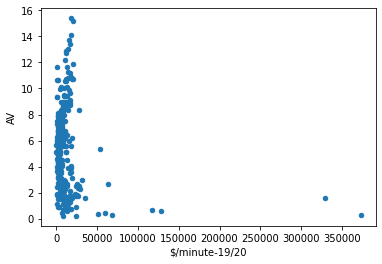

In [ ]:
complete_df.plot(kind="scatter",x="$/minute-19/20",y="AV")

<h1><b><div><font face="Garamond" color="#33302e">
Step 10: Look at Approximate Values (AV) with outliers removed
</font></div></b>
<h3><font face="Garamond" color="#33302e">
75th percentile ($14k/minute)

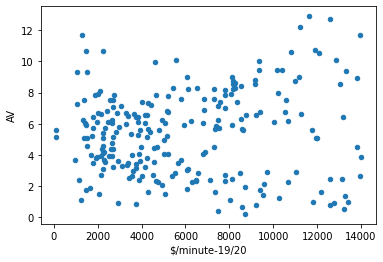

In [ ]:
complete_df[complete_df["$/minute-19/20"]<=14000].plot(kind="scatter",x="$/minute-19/20",y="AV")

<h1><b><div><font face="Garamond" color="#33302e">
Step 11: High-level player clustering
</font></div></b>
<h3><font face="Garamond" color="#33302e">
Players with above-average AV and below-average $/minute are in the upper left quadrant of the graph below.

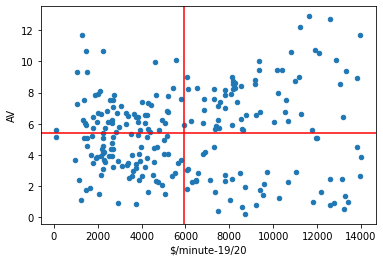

In [ ]:
complete_df[complete_df["$/minute-19/20"]<=14000].plot(kind="scatter",x="$/minute-19/20",y="AV")
plt.axvline(x=complete_df[complete_df["$/minute-19/20"]<=14000]["$/minute-19/20"].mean(),c="red")
plt.axhline(y=complete_df[complete_df["$/minute-19/20"]<=14000]["AV"].mean(),c="red")

<h1><b><div><font face="Garamond" color="#33302e">
Step 12: Create list of potential high ROI players
</font></div></b>
<h3><font face="Garamond" color="#33302e">
Store average values for both performance and salary metrics, and subsequently filter the data to only keep above-average performers with below-average pay in per-minute terms in new dataset called good_performers.

In [ ]:
relevant_dataset=complete_df[complete_df["$/minute-19/20"]<=14000]

dollar_minute_mean=relevant_dataset["$/minute-19/20"].mean()
AV_mean=relevant_dataset["AV"].mean()

good_performers=relevant_dataset[(relevant_dataset["$/minute-19/20"]<dollar_minute_mean) & (relevant_dataset["AV"]>AV_mean)]
good_performers.reset_index(inplace=True)

<h1><b><div><font face="Garamond" color="#33302e">
Step 14: Sort High ROI Players by highest AV scores
</font></div></b>
<h3><font face="Garamond" color="#33302e">
Save it as a dataframe and export the dataframe to Excel.

In [ ]:
good_performers = good_performers[good_performers["2020/21"]==0].sort_values(by="AV",ascending=False)

In [ ]:
good_performers.to_excel('/content/drive/MyDrive/stage_project_6.xlsx')  

<h1><b><div><font face="Garamond" color="#33302e">
Step 15: Find the highest AV score for each position
</font></div></b>
<h3><font face="Garamond" color="#33302e">
Select the player for the team.

In [ ]:
Centers = good_performers[(good_performers["Pos"] == 'C')]

In [ ]:
Centers.head(1)

,index,ï»¿Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,player_names,2019/20,2020/21,2021/22,2022/23,2023/24,20124/25,Credits,AV,$/minute-19/20
20,183,140,Andre Drummond,C,26,TOT,57,56,1879,418,784,0.533,5,35,0.143,413,749,0.551,0.536,169,294,0.575,250,614,864,152,109,93,203,201,1010,Andre Drummond,2401537.0,0.0,0.0,0.0,0.0,0.0,1534,11.672119,1278.093135


In [ ]:
Power_Forward = good_performers[(good_performers["Pos"] == 'PF')]
Power_Forward.head(1)

,index,ï»¿Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,player_names,2019/20,2020/21,2021/22,2022/23,2023/24,20124/25,Credits,AV,$/minute-19/20
5,57,46,Nemanja Bjelica,PF,31,SAC,72,67,2011,314,653,0.481,134,320,0.419,180,333,0.541,0.583,69,84,0.821,111,347,458,203,62,40,99,216,831,Nemanja Bjelica,2089448.0,0.0,0.0,0.0,0.0,0.0,1141,9.348565,1039.009448


In [ ]:
Small_Forward = good_performers[(good_performers["Pos"] == 'SF')]
Small_Forward.head(1)

,index,ï»¿Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,player_names,2019/20,2020/21,2021/22,2022/23,2023/24,20124/25,Credits,AV,$/minute-19/20
37,297,230,Danuel House,SF,26,HOU,63,52,1913,230,539,0.427,129,355,0.363,101,184,0.549,0.546,73,90,0.811,57,210,267,85,67,34,54,132,662,Danuel House,3894000.0,0.0,0.0,0.0,0.0,0.0,735,6.721964,2035.546262


In [ ]:
Point_Guard = good_performers[(good_performers["Pos"] == 'PG')]
Point_Guard.head(1)

,index,ï»¿Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,player_names,2019/20,2020/21,2021/22,2022/23,2023/24,20124/25,Credits,AV,$/minute-19/20
9,83,70,Bruce Brown,PG,23,DET,58,43,1634,198,447,0.443,33,96,0.344,165,351,0.47,0.48,88,119,0.739,61,213,274,230,63,29,100,162,517,Bruce Brown,4736102.0,0.0,0.0,0.0,0.0,0.0,733,6.708241,2898.471236


In [ ]:
Shooting_Guard = good_performers[(good_performers["Pos"] == 'SG')]
Shooting_Guard.head(1)

,index,ï»¿Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,player_names,2019/20,2020/21,2021/22,2022/23,2023/24,20124/25,Credits,AV,$/minute-19/20
45,369,292,Damion Lee,SG,27,GSW,49,36,1423,213,511,0.417,85,239,0.356,128,272,0.471,0.5,110,126,0.873,32,207,239,133,50,6,67,116,621,Damion Lee,1910860.0,0.0,0.0,0.0,0.0,0.0,668,6.256955,1342.839072


In [ ]:
total_cost = [2401537 + 2089448 + 3894000 + 4736102 + 1910860]
total_cost

[15031947]

<h1><b><div><font face="Garamond" color="#33302e">
Conclusion
</font></div></b>
<h3><font face="Garamond" color="#33302e">
My team would be comprised as:


*   Center: Andre Drummond $2,401,537.00

*   Power Forward: Nemanja Bjelica $2,089,448.00

*   Small Forward: Danuel House $3,894,000.00

*   Point Guard: Bruce Brown $4,736,102.00	

*   Shooting Guard: Damion Lee $1,910,860.00

Total cost: $15,031,947

